In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### **Загрузка датасета**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### **1. Вывести: кол-во наблюдений в датасете**

In [ ]:
len(df)

4622

### **2. Вывести названия столбцов**

In [ ]:
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


### **3. Определить самую частую позицию (item) в заказе**

In [ ]:
print(*df['item_name'].mode())

Chicken Bowl


### **4. Построить гистрограмму частоты заказов по позициям (item)**

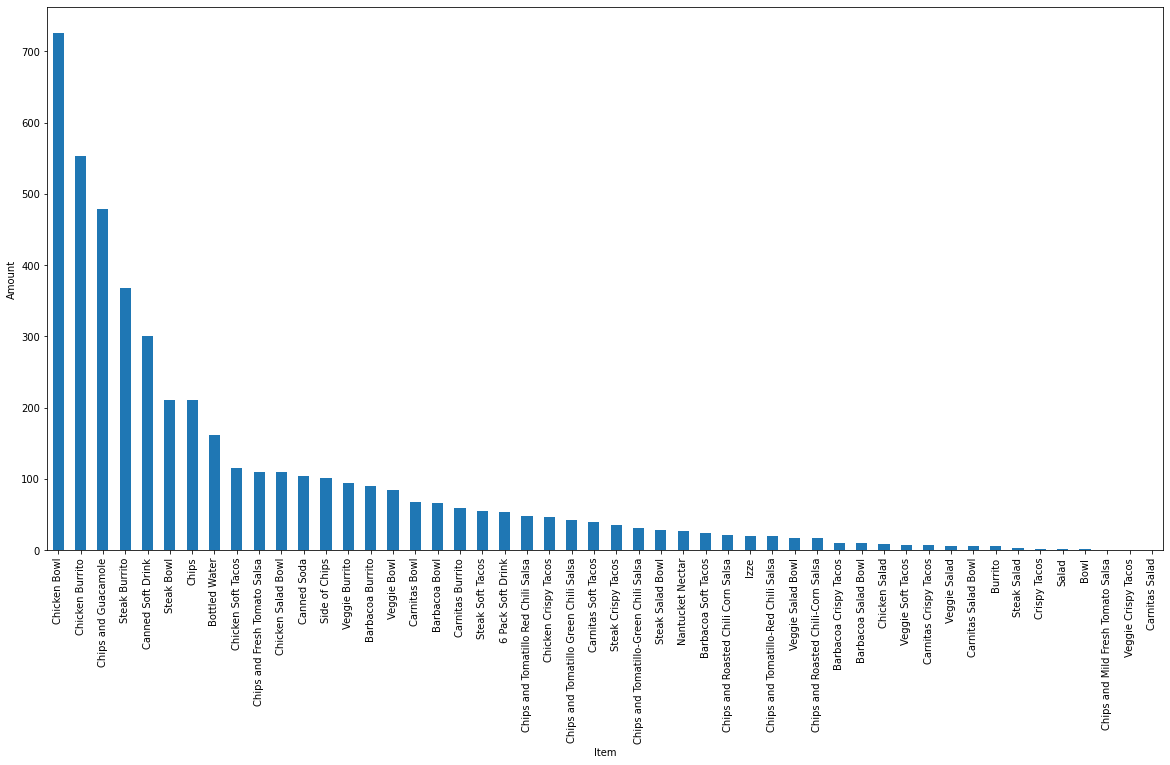

In [ ]:
plt.figure(figsize=(20, 10))
df['item_name'].value_counts().plot(kind='bar')
plt.gca().update(dict(xlabel='Item', ylabel='Amount'))
plt.show()

### **5. Измените тип переменной item_price c с помощью лямбды функции**

In [ ]:
df['item_price'] = df['item_price'].apply(lambda x: float(x[1:]))

In [ ]:
df['item_price'].dtype

dtype('float64')

### **6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)**

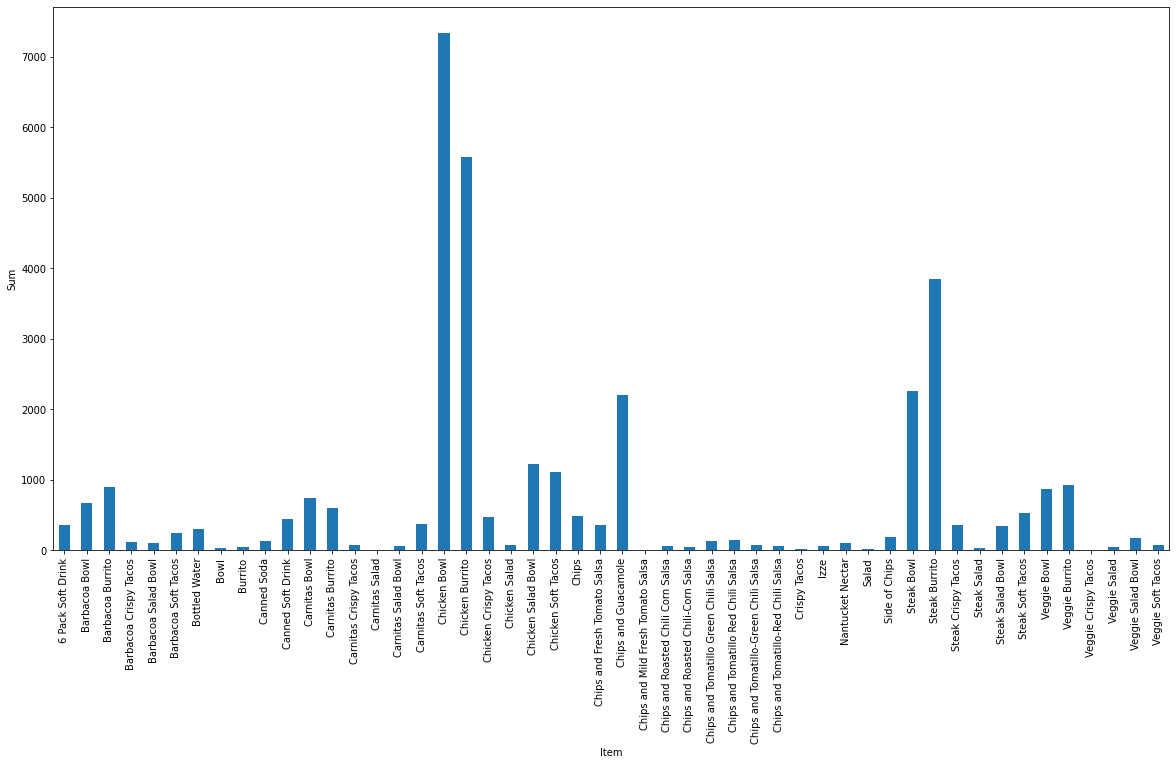

In [ ]:
cost = df.groupby(['item_name']).sum()
plt.figure(figsize=(20, 10))
cost['item_price'].plot(kind='bar')
plt.gca().update(dict(xlabel='Item', ylabel='Sum'))
plt.show()

### **7. Средняя сумма заказа? (минимум 2 способа)**

In [ ]:
round(df.groupby(['order_id']).item_price.sum().mean(), 2)

18.81

In [ ]:
round(df['item_price'].sum()/len(df['order_id'].value_counts()), 2)

18.81

### **8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе**

In [ ]:
df.groupby('order_id').item_name.nunique().agg(['mean', 'min', 'max', 'median'])

mean      2.34024
min       1.00000
max       8.00000
median    2.00000
Name: item_name, dtype: float64

### **9. Определить статистику заказов стейков, а также статистику заказов прожарки**

In [ ]:
#steaks
df[df['item_name'].str.contains("Steak")].drop(['order_id'], axis=1).describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


In [ ]:
#roasting
df[df['choice_description'].str.contains("Hot|Medium|Mild", na=False)].drop(['order_id'], axis=1).describe()

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


### **10. Добавить новый столбец цен на каждую позицию в заказе в рублях.**

In [ ]:
df['item_rub_price'] = round(df['item_price'] * 71.61, 2)
df

,order_id,quantity,item_name,choice_description,item_price,item_rub_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,171.15
1,1,1,Izze,[Clementine],3.39,242.76
2,1,1,Nantucket Nectar,[Apple],3.39,242.76
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,171.15
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1215.94
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,841.42
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,841.42
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,805.61
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,626.59


### **11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.**

In [ ]:
df.groupby('order_id').agg({'item_name': lambda df: ", ".join(df), 
                            'item_price': np.sum,
                            'quantity': np.sum})

,item_name,item_price,quantity
order_id,,,
1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
2,Chicken Bowl,16.98,2
3,"Chicken Bowl, Side of Chips",12.67,2
4,"Steak Burrito, Steak Soft Tacos",21.00,2
5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...
1830,"Steak Burrito, Veggie Burrito",23.00,2
1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2


In [ ]:
df[df['item_name'].str.contains("Steak")].groupby('order_id').agg({'item_name': lambda df: ", ".join(df), 
                                                                    'item_price': np.sum,
                                                                    'quantity': np.sum})

,item_name,item_price,quantity
order_id,,,
4,"Steak Burrito, Steak Soft Tacos",21.00,2
5,Steak Burrito,9.25,1
16,Steak Burrito,8.99,1
20,Steak Burrito,11.75,1
21,Steak Burrito,8.99,1
...,...,...,...
1810,Steak Crispy Tacos,11.75,1
1818,Steak Salad Bowl,9.39,1
1829,Steak Burrito,11.75,1


### **12. Определить цену по каждой позиции в отдельности**

In [ ]:
df1 = df
df1['one_item_price'] = round(df1['item_price'] / df1['quantity'], 2)
df1.groupby('item_name').agg({'one_item_price':lambda x: x.unique()})

,one_item_price
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [ ]:
! pip install umap-learn dataget gensim

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from umap import UMAP
import dataget
from gensim.models import Word2Vec
from gensim.downloader import load
import time

In [ ]:
# downloading datasets

# mnist
mnist = pd.read_csv('https://www.openml.org/data/get_csv/52667/mnist_784.arff')

# fashion mnist
__,__, f_mnist_x, f_mnist_y = dataget.image.fashion_mnist().get()

# coil 20
coil_20 = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/coil20.csv')

# google news
gnews_v = load('word2vec-google-news-300').vectors

In [ ]:
umap = UMAP(random_state = 2)
tsne = TSNE(n_jobs=-1, random_state=2)
pca = PCA(n_components=2)

In [ ]:
def algorithms(umap, tsne, pca, df, colors, title):
  start = time.time()
  embedding = umap.fit_transform(df)
  fig, ax = plt.subplots(3, figsize=(10, 30))
  fig.suptitle(title)
  ax[0].scatter(embedding[:, 0], embedding[:, 1], c=colors, cmap='Spectral', s=1)
  ax[0].set_title("UMAP")
  print("Time of UMAP, dataset ", title, " : ", time.time()-start)
  start = time.time()
  embedding = tsne.fit_transform(df)
  ax[1].scatter(embedding[:, 0], embedding[:, 1], c=colors, cmap='Spectral', s=1)
  ax[1].set_title("TSNE")
  print("Time of TSNE, dataset ", title, " : ", time.time()-start)
  start = time.time()
  embedding = pca.fit_transform(df)
  ax[2].scatter(embedding[:, 0], embedding[:, 1], c=colors, cmap='Spectral', s=1)
  ax[2].set_title("PCA")
  print("Time of PCA, dataset ", title, " : ", time.time()-start)

Time of UMAP, dataset  MNIST  :  102.65830302238464


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time of TSNE, dataset  MNIST  :  1262.3329765796661
Time of PCA, dataset  MNIST  :  4.728167295455933


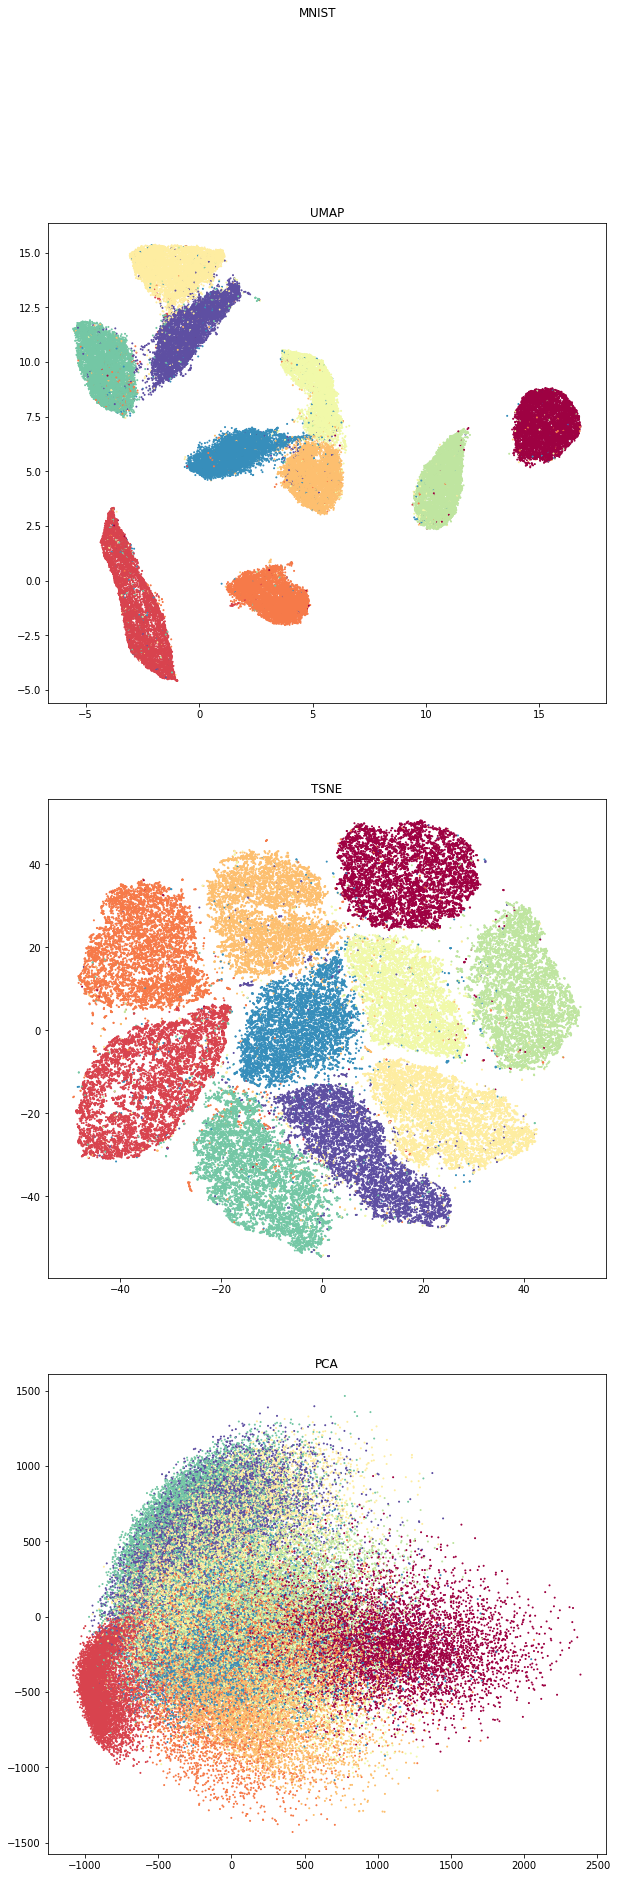

In [ ]:
algorithms(umap, tsne, pca, mnist, mnist['class'], "MNIST")

Time of UMAP, dataset  Fashion MNIST  :  31.05646300315857


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time of TSNE, dataset  Fashion MNIST  :  90.95518469810486
Time of PCA, dataset  Fashion MNIST  :  0.8269622325897217


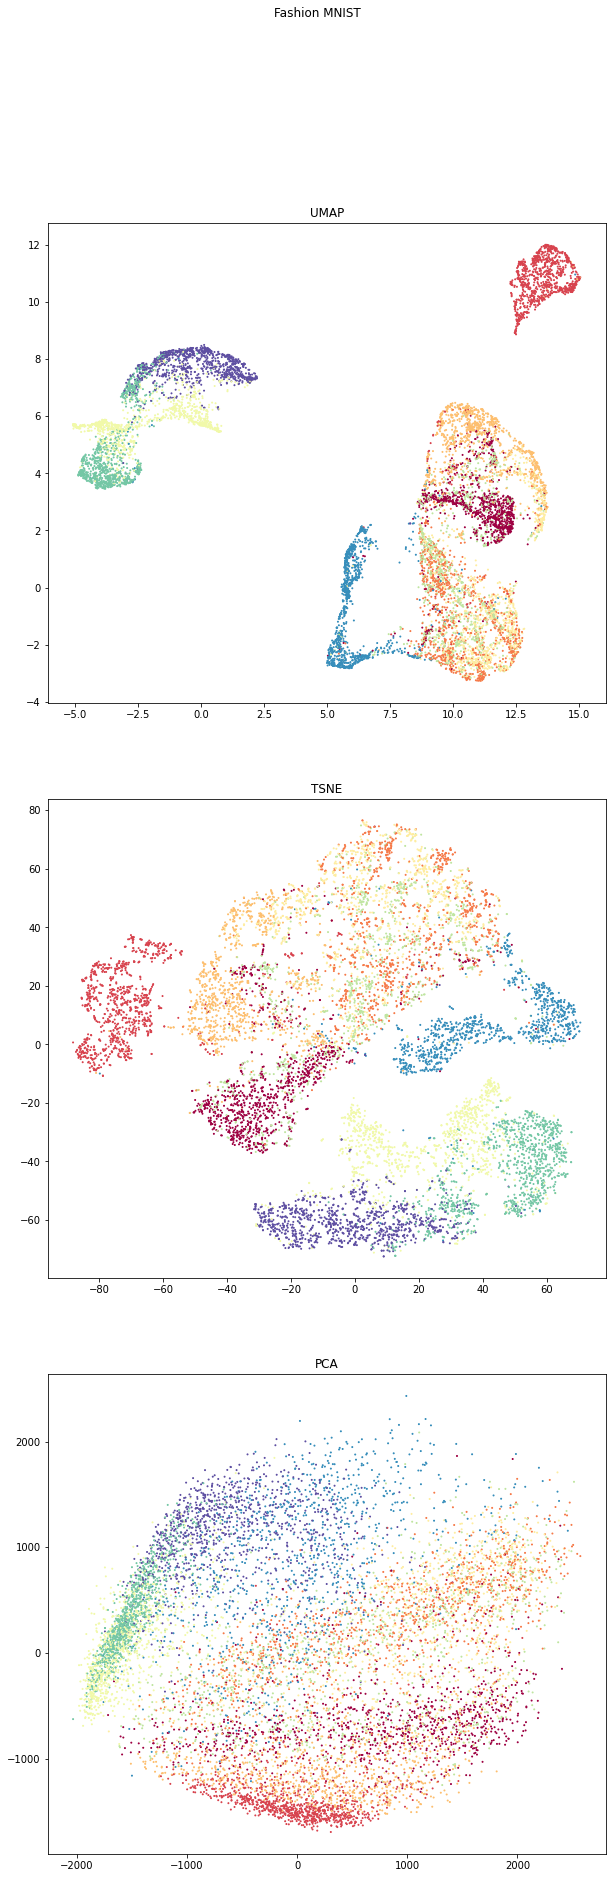

In [ ]:
f_mnist = f_mnist_x.reshape(-1, 28*28)
algorithms(umap, tsne, pca, f_mnist, f_mnist_y, "Fashion MNIST")

Time of UMAP, dataset  COIL20  :  6.379753589630127


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time of TSNE, dataset  COIL20  :  8.06018614768982
Time of PCA, dataset  COIL20  :  0.1780228614807129


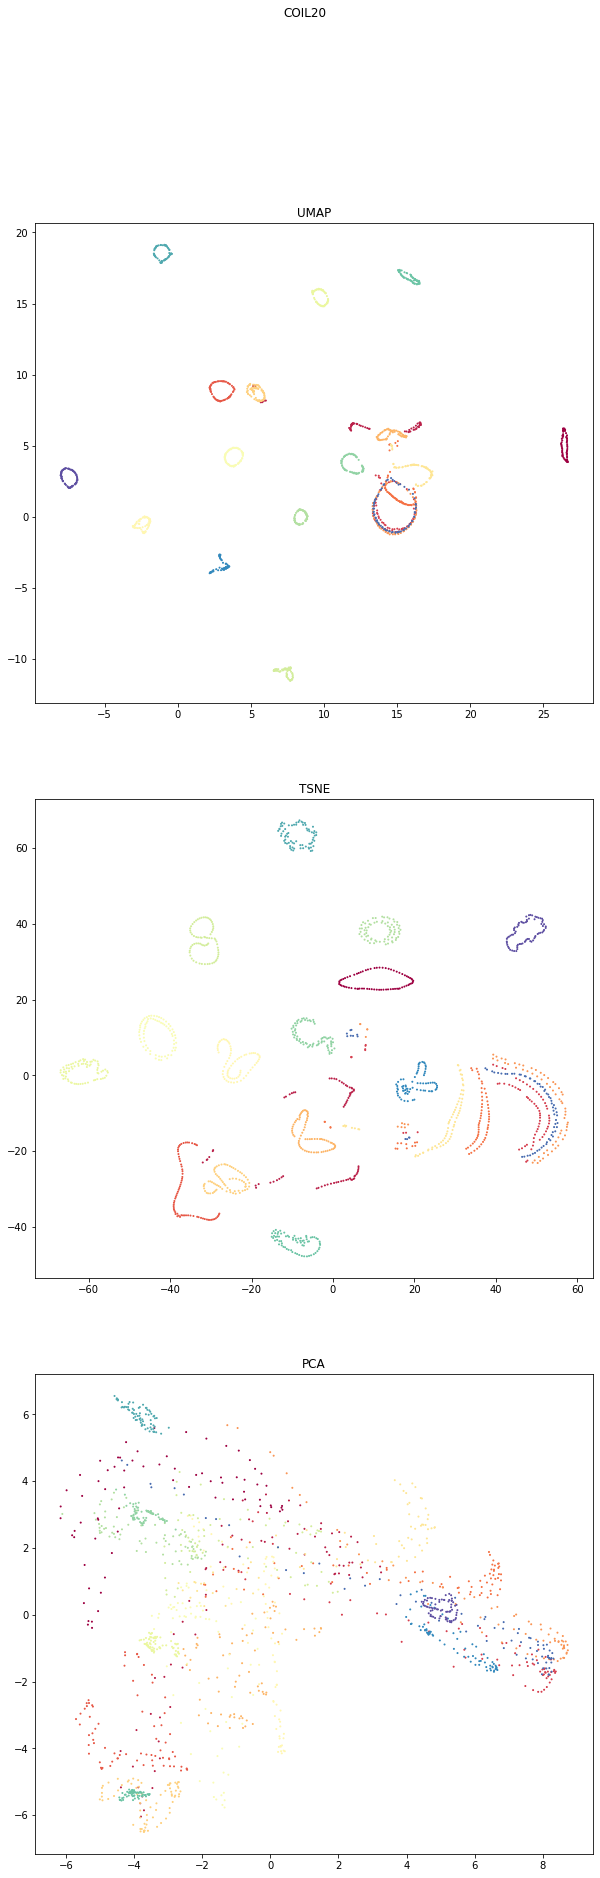

In [ ]:
algorithms(umap, tsne, pca, coil_20.drop('1025', axis=1), coil_20['1025'], "COIL20")

Time of UMAP, dataset  Word Vectors  :  170.1242277622223


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Time of TSNE, dataset  Word Vectors  :  2359.0254549980164
Time of PCA, dataset  Word Vectors  :  1.767730951309204


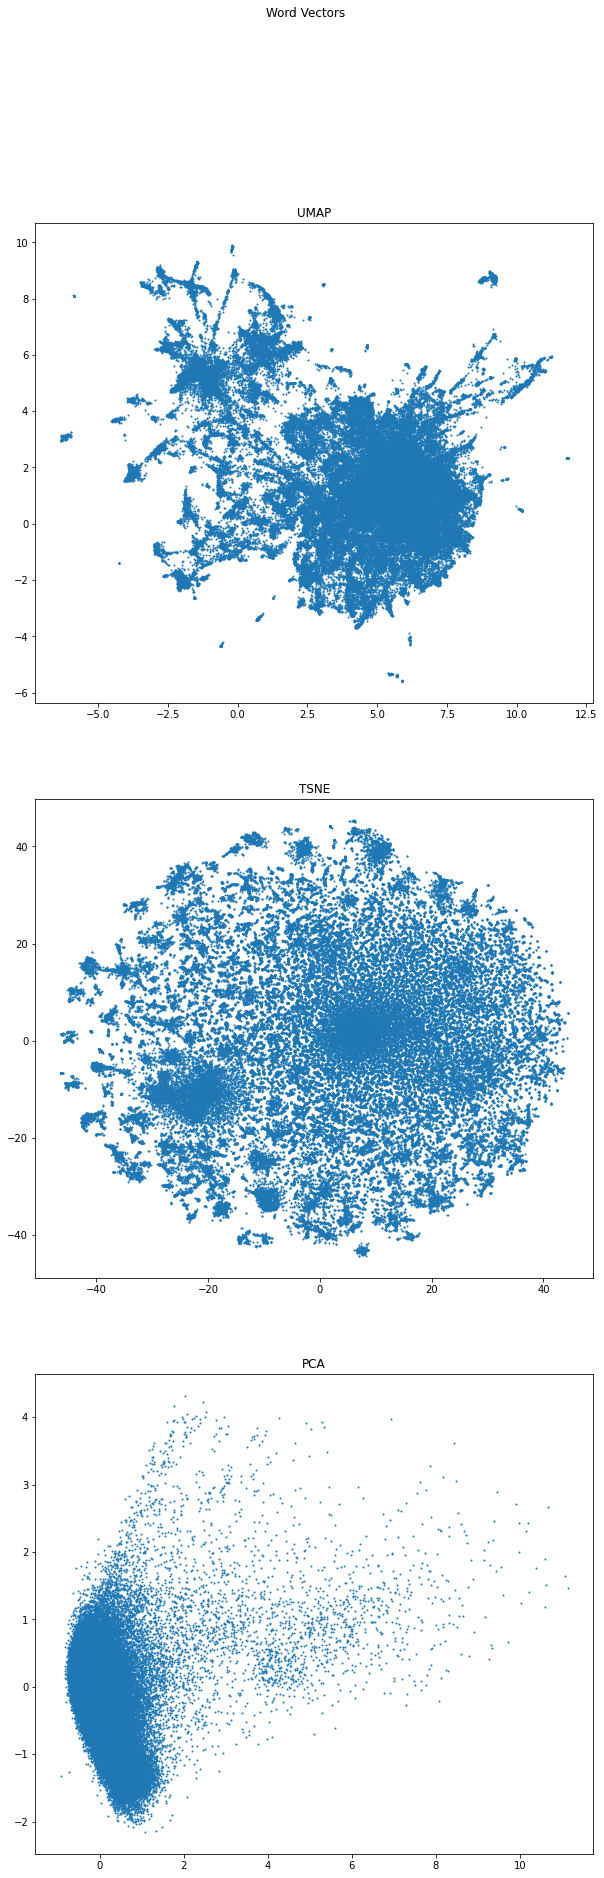

In [ ]:
algorithms(umap, tsne, pca, gnews_v[:100000], None, "Word Vectors")

# **Вывод**

В целом, полученные графики сопоставими с представленными в статье. **Word Vectors** слегка отличается из-за сокращения размера датасета в 30 раз по причине переполнения ОЗУ.


1. Алгоритм **UMAP** работает достаточно быстро, отражает глобальную структуру в данных, при этом сохраняя локальную структуру. 

  Полученное время на различных данных:

  *   MNIST: 102.65 seconds
  *   Fashion MNIST: 31.05 seconds
  *   COIL20: 6.37 seconds
  *   Word Vectors: 170.12 seconds


2. Алгоритм **TSNE** работает значительно медленнее двух других алгоритмов (особенно это заметно на датасетах **MNIST** и **Word Vectors**), но сохраняет локальную структуру в данных.

  Полученное время на различных данных:

  *   MNIST: 1262.33 seconds
  *   Fashion MNIST: 90.95 seconds
  *   COIL20: 8.06 seconds
  *   Word Vectors: 2359.02 seconds


2. Алгоритм **PCA** является самым быстрым из всех алгоритмов, но не сохраняет глобальную структуру в данных.

  Полученное время на различных данных:

  *   MNIST: 4.72 seconds
  *   Fashion MNIST: 0.82 seconds
  *   COIL20: 0.17 seconds
  *   Word Vectors: 1.76 seconds

